<a href="https://colab.research.google.com/github/Zinga18018/Ipynb_Project_Snippets/blob/main/Calorie_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
import catboost
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.8 MB/s eta 0:00:00


In [3]:
df = pd.read_csv('exercise.csv')
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [4]:
df2 = pd.read_csv('calories.csv')
df2.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [6]:
df = pd.merge(df, df2, on='User_ID')

In [7]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [9]:
df.shape

(15000, 9)

In [10]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [22]:
df.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [25]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [26]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [28]:
df.drop('User_ID',axis = 1)

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,0,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,0,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,0,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,1,78,193.0,97.0,2.0,84.0,38.3,11.0


In [61]:
x = df.drop(['Calories','User_ID'],axis = 1)
y = df['Calories']

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [76]:
pram_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10,20],
    'min_child_weight': [1, 2, 4],
    'learning_rate': [0.01, 0.1, 0.2],
    'reg_alpha': [0.1,1,10],
    'reg_lambda': [0.1,1,10]
}

In [77]:
random_search = RandomizedSearchCV(
    estimator=XGBRegressor(),
    param_distributions=pram_grid,
    n_iter=10,
    cv=5,
    verbose=2,
    random_state=42)

In [78]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END learning_rate=0.1, max_depth=20, min_child_weight=4, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1; total time=   3.6s
[CV] END learning_rate=0.1, max_depth=20, min_child_weight=4, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1; total time=   2.0s
[CV] END learning_rate=0.1, max_depth=20, min_child_weight=4, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1; total time=   1.9s
[CV] END learning_rate=0.1, max_depth=20, min_child_weight=4, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1; total time=   1.9s
[CV] END learning_rate=0.1, max_depth=20, min_child_weight=4, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=4, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=4, n_estimators=200, reg_alpha=1, reg_lambda=1; total time=   0.8s
[CV] END learning_rate=0.01, max_de

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [None, 10, 20],
                                        'min_child_weight': [1, 2, 4],
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': [0.1, 1, 10],
                                        'reg_lambda': [0.1, 1, 10]},
                   random_state=42, verbose=2)

In [79]:
y_pred = random_search.predict(x_test)

In [80]:
print(mean_squared_error(y_test,y_pred))

2.643112268028468


In [81]:
y_train_pred = random_search.predict(x_train)
print(mean_squared_error(y_train,y_train_pred))

1.3127691731469477


In [83]:
print(r2_score(y_test,y_pred))

0.9993450820532048


In [71]:
x.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,68,190.0,94.0,29.0,105.0,40.8
1,0,20,166.0,60.0,14.0,94.0,40.3
2,1,69,179.0,79.0,5.0,88.0,38.7
3,0,34,179.0,71.0,13.0,100.0,40.5
4,0,27,154.0,58.0,10.0,81.0,39.8


In [88]:
model_cat = CatBoostRegressor()

In [97]:
cat_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.0,0.01,0.1],
    'depth': [6, 8, 10]

}

In [98]:
random_search_cat = RandomizedSearchCV(
    estimator=CatBoostRegressor(),
    param_distributions=cat_grid,
    n_iter=10,
    cv=5,
    verbose=2,
    random_state=42)

In [99]:
random_search_cat.fit(x_train,y_train)


Streaming output truncated to the last 5000 lines.
146:	learn: 1.6005916	total: 297ms	remaining: 310ms
147:	learn: 1.5929324	total: 299ms	remaining: 307ms
148:	learn: 1.5828336	total: 301ms	remaining: 305ms
149:	learn: 1.5712249	total: 303ms	remaining: 303ms
150:	learn: 1.5610780	total: 305ms	remaining: 301ms
151:	learn: 1.5542597	total: 307ms	remaining: 299ms
152:	learn: 1.5478776	total: 309ms	remaining: 296ms
153:	learn: 1.5389568	total: 310ms	remaining: 294ms
154:	learn: 1.5291269	total: 312ms	remaining: 292ms
155:	learn: 1.5225855	total: 314ms	remaining: 290ms
156:	learn: 1.5183823	total: 316ms	remaining: 288ms
157:	learn: 1.5140505	total: 317ms	remaining: 285ms
158:	learn: 1.5074953	total: 319ms	remaining: 283ms
159:	learn: 1.4997989	total: 321ms	remaining: 281ms
160:	learn: 1.4913747	total: 323ms	remaining: 279ms
161:	learn: 1.4855605	total: 325ms	remaining: 277ms
162:	learn: 1.4741930	total: 327ms	remaining: 275ms
163:	learn: 1.4694734	total: 328ms	remaining: 272ms
164:	learn: 1

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x7e1984b1eff0>,
                   param_distributions={'depth': [6, 8, 10],
                                        'iterations': [100, 200, 300],
                                        'learning_rate': [0.0, 0.01, 0.1]},
                   random_state=42, verbose=2)

In [95]:
y_cat_pred = random_search_cat.predict(x_test)
y_cat_train_pred = random_search_cat.predict(x_train)

In [100]:
print(mean_squared_error(y_test,y_cat_pred))

45.0714668847188


In [101]:
print(r2_score(y_test,y_cat_pred))

0.9888320625240777


In [102]:
print(mean_squared_error(y_train,y_cat_train_pred))

43.639923886684365


In [107]:
def plot_important_features(model,x_train):
    feature_importance = model.feature_importances_
    feature_names = x_train.columns
    sorted_idx = np.argsort(feature_importance)
    plt.barh(feature_names[sorted_idx],feature_importance[sorted_idx])
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance')
    plt.show()
    return feature_importance,feature_names,sorted_idx

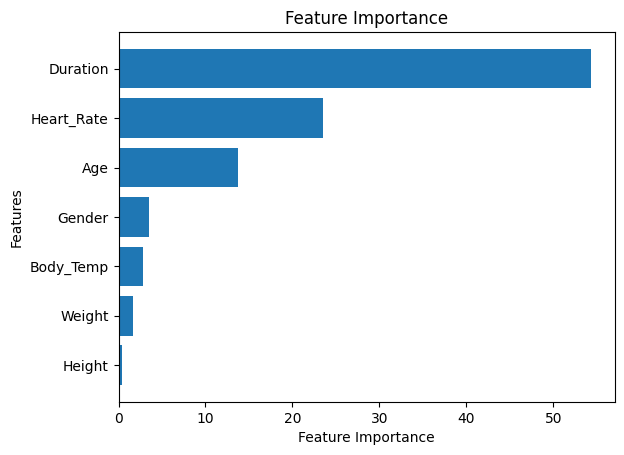

(array([ 3.4679392 , 13.78557516,  0.39560532,  1.71929036, 54.33797074,
        23.46549103,  2.82812818]),
 Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
        'Body_Temp'],
       dtype='object'),
 array([2, 3, 6, 0, 1, 5, 4]))

In [109]:
plot_important_features(random_search_cat.best_estimator_,x_train)